# README
This notebook is used to get some data statistics

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from data_provider.data_split_recorder import split_recorder
import pickle
from tqdm import tqdm
from batteryml.data.battery_data import BatteryData
import json

In [18]:
def read_cell_data_according_to_prefix(data_root_path, file_name):
    '''
    Read the battery data and eol according to the file_name
    The dataset is indicated by the prefix of the file_name
    '''
    prefix = file_name.split('_')[0]
    
    if prefix == 'MICH':
        with open(f'{data_root_path}/total_MICH_labels.json') as f:
            life_labels = json.load(f)
    elif prefix.startswith('Tongji'):
        with open(f'{data_root_path}/Tongji_labels.json') as f:
            life_labels = json.load(f)
    else:
        with open(f'{data_root_path}/{prefix}_labels.json') as f:
            life_labels = json.load(f)
    if file_name in life_labels:
        eol = life_labels[file_name]
    else:
        eol = None
    return eol

In [ ]:
dataset_name = 'MIX_large'
data_root_path = '/data/trf/python_works/Battery-LLM/dataset'

if dataset_name == 'Tongji':
    train_files = split_recorder.Tongji_train_files
    val_files = split_recorder.Tongji_val_files
    test_files = split_recorder.Tongji_test_files
elif dataset_name == 'HUST':
    train_files = split_recorder.HUST_train_files
    val_files = split_recorder.HUST_val_files
    test_files = split_recorder.HUST_test_files
elif dataset_name == 'MATR':
    train_files = split_recorder.MATR_train_files
    val_files = split_recorder.MATR_val_files
    test_files = split_recorder.MATR_test_files
elif dataset_name == 'SNL':
    train_files = split_recorder.SNL_train_files
    val_files = split_recorder.SNL_val_files
    test_files = split_recorder.SNL_test_files
elif dataset_name == 'MICH':
    train_files = split_recorder.MICH_train_files
    val_files = split_recorder.MICH_val_files
    test_files = split_recorder.MICH_test_files
elif dataset_name == 'MICH_EXP':
    train_files = split_recorder.MICH_EXP_train_files
    val_files = split_recorder.MICH_EXP_val_files
    test_files = split_recorder.MICH_EXP_test_files
elif dataset_name == 'UL_PUR':
    train_files = split_recorder.UL_PUR_train_files
    val_files = split_recorder.UL_PUR_val_files
    test_files = split_recorder.UL_PUR_test_files
elif dataset_name == 'RWTH':
    train_files = split_recorder.RWTH_train_files
    val_files = split_recorder.RWTH_val_files
    test_files = split_recorder.RWTH_test_files
elif dataset_name == 'MIX':
    train_files = split_recorder.MIX_train_files
    val_files = split_recorder.MIX_val_files 
    test_files = split_recorder.MIX_test_files
elif dataset_name == 'HNEI':
    train_files = split_recorder.HNEI_train_files
    val_files = split_recorder.HNEI_val_files
    test_files = split_recorder.HNEI_test_files
elif dataset_name == 'CALCE':
    train_files = split_recorder.CALCE_train_files
    val_files = split_recorder.CALCE_val_files
    test_files = split_recorder.CALCE_test_files
elif dataset_name == 'Stanford':
    train_files = split_recorder.Stanford_train_files
    val_files = split_recorder.Stanford_val_files
    test_files = split_recorder.Stanford_test_files
elif dataset_name == 'ISU_ILCC':
    train_files = split_recorder.ISU_ILCC_train_files
    val_files = split_recorder.ISU_ILCC_val_files
    test_files = split_recorder.ISU_ILCC_test_files
elif dataset_name == 'MIX_small':
    train_files = split_recorder.MIX_small_train_files
    val_files = split_recorder.MIX_small_val_files 
    test_files = split_recorder.MIX_small_test_files
elif dataset_name == 'MIX_large':
    train_files = split_recorder.MIX_large_train_files
    val_files = split_recorder.MIX_large_val_files 
    test_files = split_recorder.MIX_large_test_files
elif dataset_name == 'MIX_c':
    train_files = split_recorder.MIX_train_files_complete
    val_files = split_recorder.MIX_val_files_complete 
    test_files = split_recorder.MIX_test_files_complete  
elif dataset_name == 'MIX_c_woISU':
    train_files = split_recorder.MIX_train_files_complete_woISU
    val_files = split_recorder.MIX_val_files_complete_woISU 
    test_files = split_recorder.MIX_test_files_complete_woISU  


total_lives = []
train_lives = []
total_files = train_files + val_files + test_files
total_used_files = []
for file_name in total_files:
    eol = read_cell_data_according_to_prefix(data_root_path, file_name)
    if not eol:
        continue
    total_lives.append(eol)
    if file_name in train_files:
        train_lives.append(eol)
    if eol > 100:
        total_used_files.append(file_name)
print(f'{len(train_files)}/{len(val_files)}/{len(test_files)}')
print(f'{len(total_used_files)}/{len(total_files)}')

467/144/230
821/841


In [20]:
print(f'{dataset_name}| Avg {np.mean(total_lives)} | Max {np.max(total_lives)} | Min {np.min(total_lives)} | Std {np.std(total_lives)}')

MIX_large| Avg 866.754491017964 | Max 4999 | Min 1 | Std 760.5943332193185


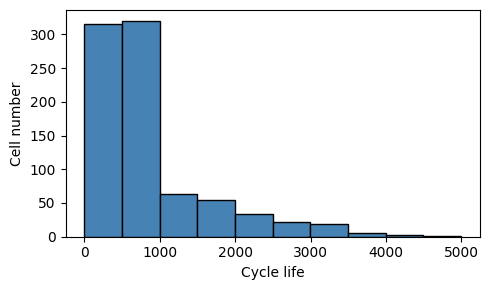

In [21]:
fig = plt.figure(figsize=(5,3))
# plt.hist(total_lifes, bins=[1,250, 500, 600, 700, 750, 800, 900, 1000, 1250, 1500, 1750, 2000, max(total_lifes)])
plt.hist(x = total_lives, # 指定绘图数据
         bins = 10, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
plt.ylabel('Cell number')
plt.xlabel('Cycle life')
fig.tight_layout()
plt.show()


In [22]:
# Evenly divide the life into four parts
life_labels_json = {}
train_lives = np.array(train_lives)
train_lives = train_lives[train_lives>=100]
num_classes = 8
cut_base = 100 / num_classes
total_cutoffs = []
for i in range(num_classes-1):
    cutoff = int(np.percentile(train_lives, (i+1)*cut_base))
    total_cutoffs.append(cutoff)
print(total_cutoffs)

for i, cutoff in enumerate(total_cutoffs):
    if i == 0:
        key = i + 1
        life_labels_json[str(key)] = [0, cutoff]
    else:
        key = i + 1
        life_labels_json[str(key)] = [total_cutoffs[i-1], cutoff]
life_labels_json[str(num_classes)] = [max(total_cutoffs), 10000000000000]

count = 0
for key, value in life_labels_json.items():
    tmp = train_lives[train_lives>value[0]]
    tmp = tmp[tmp<=value[1]]
    count += len(tmp)
    print(key, value, len(tmp))

life_count_json = {

}
a = ['RWTH_007.pkl']
b = [752]
for file, life in zip(total_used_files , train_lives):
    match = False
    for key, value in life_labels_json.items():
        if float(life) > value[0] and float(life) <= value[1]:
            life_count_json[key] = life_count_json.get(key, 0) + 1
            match =True
            
    if not match:
        print(file, life)

print(life_labels_json)
# life_labels_json = {
#     '1': [0, 1000],
#     '2': [1000, 2000],
#     '3': [2000, 3000],
#     '4': [3000, 100000000]
# }
print(life_labels_json)
with open('data_provider/life_classes.json', 'w') as f:
    json.dump(life_labels_json, f)

[299, 406, 494, 603, 735, 952, 1860]
1 [0, 299] 58
2 [299, 406] 56
3 [406, 494] 57
4 [494, 603] 57
5 [603, 735] 56
6 [735, 952] 57
7 [952, 1860] 57
8 [1860, 10000000000000] 57
{'1': [0, 299], '2': [299, 406], '3': [406, 494], '4': [494, 603], '5': [603, 735], '6': [735, 952], '7': [952, 1860], '8': [1860, 10000000000000]}
{'1': [0, 299], '2': [299, 406], '3': [406, 494], '4': [494, 603], '5': [603, 735], '6': [735, 952], '7': [952, 1860], '8': [1860, 10000000000000]}
